<a href="https://colab.research.google.com/github/STORMBREAKER369/Ai-fest/blob/main/AI_fest_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from google.colab import files # Upload a file
from IPython.display import Image # Display an image

In [24]:
uploaded =  files.upload() # Uploading....

In [31]:
# Check the uploaded files
for fn in uploaded.keys():
  print('user uploaded file "{name}" with length "{length}" bytes' .format(name =fn, length=len(uploaded[fn])))

In [32]:
from zipfile import ZipFile
file_name = "archive.zip" # Name of the ZIP file

with ZipFile(file_name, 'r') as zip: # Opening the ZIP file
  zip.extractall() # Extract all the contents of the ZIP file to the current directory
  print("Done")

Done


In [33]:
# Libraries
import tensorflow as tf
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [34]:
train_dir = 'train' # Directory containing the training images
val_dir = 'test'  # Directory containing the validation images
train_datagen = ImageDataGenerator(rescale=1./255) # Normalize pixel values to the range [0, 1]
val_datagen = ImageDataGenerator(rescale=1./255) # Normalize pixel values for validation data
# Creation of data generators
train_generator = train_datagen.flow_from_directory(
        train_dir, # Directory of training images
        target_size=(48,48), # Resize images to (48, 48) pixels
        batch_size=64, # Number of images to load in each batch
        color_mode="grayscale", # Convert images to grayscale (single channel)
        class_mode='categorical') # Use categorical labels (one-hot encoding) for classification

validation_generator = val_datagen.flow_from_directory(
        val_dir,  # Directory of validation images
        target_size=(48,48), # Resize images to (48, 48) pixels
        batch_size=64,  # Number of images to load in each batch
        color_mode="grayscale",  # Convert images to grayscale
        class_mode='categorical') # Use categorical labels

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [35]:
emotion_model = Sequential() # Create a Sequential model
# Add a 2D convolutional layer with 32 filters, a 3x3 kernel, and ReLU activation
# Input shape is (48, 48, 1) representing images with a size of 48x48 pixels and 1 channel (grayscale)
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
# Add another 2D convolutional layer with 64 filters and a 3x3 kernel
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# Add a max-pooling layer with a 2x2 pool size
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropout layer to prevent overfitting
emotion_model.add(Dropout(0.25))
# Add another 2D convolutional layer with 128 filters and a 3x3 kernel
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Add max-pooling layer
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
# Add another 2D convolutional layer with 128 filters and a 3x3 kernel
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Add max-pooling layer
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropout layer to prevent overfitting
emotion_model.add(Dropout(0.25))
# Flatten the output from the convolutional layers
emotion_model.add(Flatten())
# Add a fully connected (dense) layer with 1024 units and ReLU activation
emotion_model.add(Dense(1024, activation='relu'))
# Add dropout layer to prevent overfitting
emotion_model.add(Dropout(0.5))
# Add the output layer with 7 units (assuming 7 different emotions) and softmax activation
emotion_model.add(Dense(7, activation='softmax'))

In [36]:
from tensorflow.keras.optimizers import Adam


# Compile the model
emotion_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)




In [37]:
#Saving the model
emotion_model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:
from keras.models import load_model
emotion_model = load_model('model.h5') # Load the pre-trained model from the 'model.h5' file

In [39]:
def emotion_analysis(emotions):
    # Define a list of emotion labels corresponding to the provided percentages
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    # Create an array of evenly spaced values for the x-axis ticks
    y_pos = np.arange(len(objects))
    # Create a bar chart
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    # Set the x-axis ticks to be the emotion labels
    plt.xticks(y_pos, objects)
    # Set the y-axis label
    plt.ylabel('percentage')
    # Set the title of the bar chart
    plt.title('emotion')
    # Display the bar chart
    plt.show()

In [40]:
#CODE for Capturing an image on Colab from here: https://colab.research.google.com/notebook#fileId=1OnUy6eFE7XhdfGfAHDCqQxpwueTOj_NO

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [43]:
take_photo()

<IPython.core.display.Javascript object>

'photo.jpg'

OpenCV(4.8.0) /io/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'

1/1 [==============================] - 0s 18ms/step


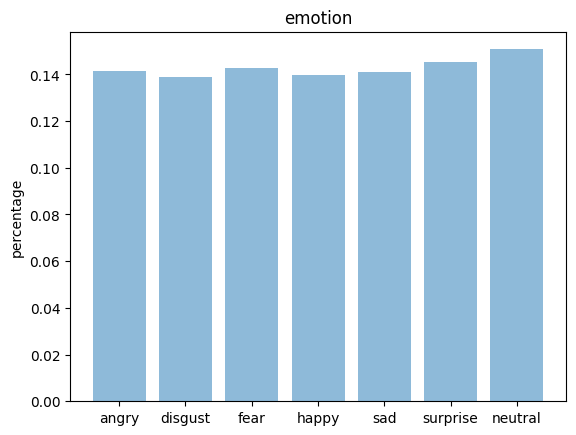

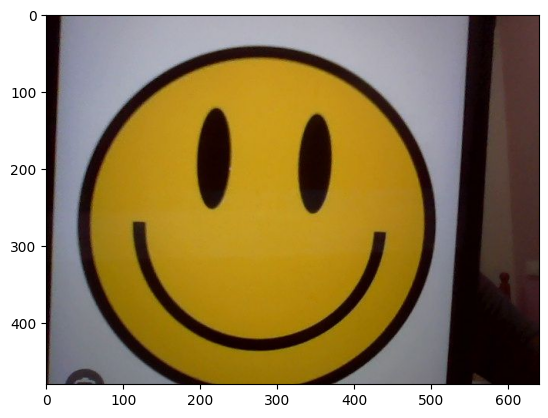

In [44]:
import cv2

def facecrop(image):
    facedata = '/content/haarcascade_frontalface_alt.xml'
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image)

    try:

        minisize = (img.shape[1],img.shape[0])
        miniframe = cv2.resize(img, minisize)

        faces = cascade.detectMultiScale(miniframe)

        for f in faces:
            x, y, w, h = [ v for v in f ]
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

            sub_face = img[y:y+h, x:x+w]


            cv2.imwrite('capture.jpg', sub_face)
            #print ("Writing: " + image)

    except Exception as e:
        print (e)




if __name__ == '__main__':
    facecrop('/content/photo.jpg')

#Testing a file.

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


file = '/content/photo.jpg'
true_image = image.load_img(file)
img = image.load_img(file, color_mode="grayscale", target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = emotion_model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);


plt.imshow(true_image)
plt.show()